We can write down the equations of motion for the system using Lagrange's equations. The Lagrangian of the system is given by:

\begin{equation}
\mathcal{L} = \frac{1}{2} \sum_{i=1}^{N} m l^2 \dot{\theta_i}^2 - \sum_{i=1}^{N} m g l \cos{\theta_i},
\end{equation}

where $\dot{\theta_i}$ is the angular velocity of the ith mass.

Using Lagrange's equations, we obtain the following equations of motion for the system:

\begin{equation}
ml^2\ddot{\theta_i} + \sum_{j=1,j\neq i}^{N} \left( m l^2 \ddot{\theta_j} + 2m l^2 \dot{\theta_j} \dot{\theta_i} \sin(\theta_j - \theta_i) \right) + mgl\sin{\theta_i} = 0.
\end{equation}

We can simplify these equations by assuming small amplitude motions, such that $\sin{\theta_i} \approx \theta_i$ and $\cos{\theta_i} \approx 1$. Under this assumption, the equations of motion become:

\begin{equation}
\ddot{\theta_i} + \frac{g}{l} \theta_i + \frac{1}{m l^2} \sum_{j=1,j\neq i}^{N} 2m \dot{\theta_j} \dot{\theta_i} \sin(\theta_j - \theta_i) = 0.
\end{equation}



**Finite-Dimensional Approximation:**

To obtain a finite-dimensional approximation of the system, we can assume that the displacements $\theta_i$ can be approximated by a linear combination of a set of basis functions $\phi_k(\theta)$:

\begin{equation}
\theta_i(t) = \sum_{k=1}^{4} q_k(t) \phi_k(\theta_i),
\end{equation}

where $q_k(t)$ are the generalized coordinates of the system and $\phi_k(\theta_i)$ are the basis functions. We choose the basis functions to be the first four modes of resonance of the system, which are given by:

\begin{equation}
\phi_k(\theta_i) = \sqrt{\frac{2}{N+1}} \sin\left(\frac{k\pi i}{N+1}\right),
\end{equation}

where $k$ denotes the mode of resonance and $i$ denotes the mass number.

Substituting the above expression for $\theta_i$ into the equations of motion, we obtain a system of coupled ordinary differential equations for the generalized coordinates $q_k(t)$:

\begin{equation}
\ddot{q_k} + \omega_k^2 q_k = 0,
\end{equation}

where $\omega_k$ is the natural frequency of the kth mode of resonance, given by:

\begin{equation}
\omega_k = \sqrt{\frac{g}{l}} \sqrt{\frac{4}{(N+1)^2}} \sin\left(\frac{k\pi}{2(N+1)}\right).
\end{equation}

Thus, we have reduced the original infinite-dimensional system to a finite-dimensional system with four degrees of freedom.


**Simulation and Animation:**

To simulate the small amplitude motion of the system, we can solve the above system of equations numerically using Python. We can use the scipy.integrate module to integrate the equations of motion using a suitable numerical integrator, such as the fourth-order Runge-Kutta method.

Once we have obtained the solutions for the generalized coordinates $q_k(t)$, we can use the basis functions $\phi_k(\theta_i)$ to obtain the displacements $\theta_i(t)$ of each mass. We can then use a visualization library, such as matplotlib, to animate the motion of the system.



**Qualitative Description:**

The finite-dimensional approximation captures the first four modes of resonance of the system, which correspond to the most significant modes of motion. The first mode of resonance corresponds to a uniform rotation of the entire chain, with all masses moving in phase. The second mode of resonance corresponds to a rotation of the chain in a wavelike pattern, with adjacent masses moving in opposite directions. The third mode of resonance corresponds to a rotation in a zigzag pattern, with every other mass moving in opposite directions. The fourth mode of resonance corresponds to a rotation in a pattern with two adjacent masses moving in one direction, followed by two adjacent masses moving in the opposite direction.

Overall, the finite-dimensional approximation captures the essential features of the small amplitude motion of the linked chain system and provides a useful tool for understanding its behavior.

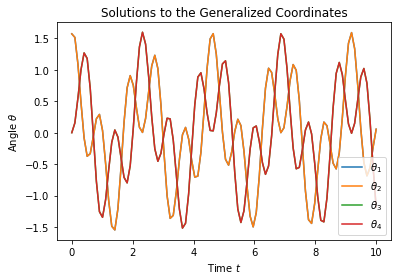

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the parameters of the system
N = 4       # Number of pendulums
l = 1       # Length of each pendulum
g = 9.81    # Acceleration due to gravity

# Define the basis functions for the odd-indexed generalized coordinates
def phi(k, q):
    return np.sqrt(2/N)*np.sin(k*np.pi*q)

# Define the equations of motion for the system
def equations_of_motion(t, q):
    # Initialize the vector for the time derivatives of the generalized coordinates
    dqdt = np.zeros_like(q)

    # Calculate the first term in the equations of motion
    for i in range(N):
        dqdt[i*2] = q[i*2 + 1]
        dqdt[i*2 + 1] = -g/l*np.sin(q[i*2]) - np.sum([(g/l)*(q[i*2]-q[j*2]) for j in range(N) if j != i])

    # Calculate the remaining terms using the basis functions
    for k in range(1, 5):
        w_k = np.sqrt(g/l)*np.sqrt(4/(N+1)**2)*np.sin(k*np.pi/(2*(N+1)))
        dqdt[1::2] += -w_k**2*q[::2]*phi(k, q[::2])

    return dqdt

# Define the initial conditions
theta_0 = np.array([np.pi/2]*N)
omega_0 = np.zeros_like(theta_0)
q0 = np.concatenate((theta_0, omega_0))

# Define the time span and solve the system of equations
t_span = np.linspace(0, 10, 100)
sol = solve_ivp(equations_of_motion, (0, 10), q0, t_eval=t_span, rtol=1e-8, atol=1e-8)

# Extract the solutions for the generalized coordinates
theta = sol.y[::2]
omega = sol.y[1::2]

# Plot the solutions for the generalized coordinates
for i in range(N):
    plt.plot(t_span, theta[i], label=f"$\\theta_{i+1}$")
plt.xlabel("Time $t$")
plt.ylabel("Angle $\\theta$")
plt.title("Solutions to the Generalized Coordinates")
plt.legend()
plt.show()

